In [62]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Reading csv file to datframe

df = pd.read_csv('/content/3.concertriccir2.csv',header=None)

In [64]:
# Starting 5 data points
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [65]:
# Shape of dataframe
df.shape

(500, 3)

In [66]:
df[[0,1]]

,0,1
0,0.700335,-0.247068
1,-3.950019,2.740080
2,0.150222,-2.157638
3,-1.672050,-0.941519
4,2.560483,-1.846577
...,...,...
495,2.177895,2.984489
496,1.778905,2.869205
497,0.894180,3.069959
498,0.849439,3.875435


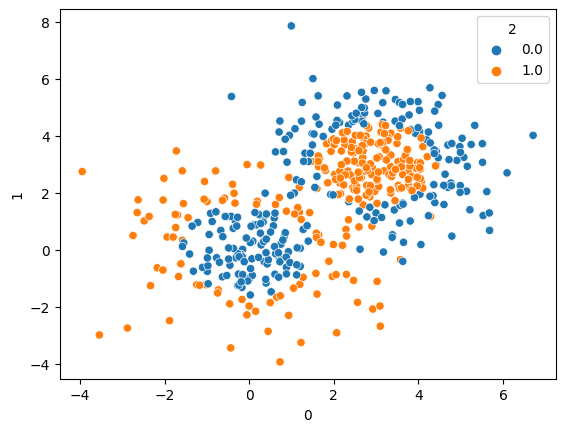

In [67]:
sns.scatterplot(x=df[0],y= df[1],hue=df[2]);

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

In [69]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [70]:
x_test.shape

(50, 2)

In [71]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainf = std.fit_transform(x_train)
x_testf = std.transform(x_test)

In [96]:
model=Sequential()
model.add(Dense(6,activation="tanh",input_dim=2))

model.add(Dense(5,activation="tanh"))

model.add(Dense(4,activation="tanh"))

model.add(Dense(3,activation="tanh"))

model.add(Dense(2,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [97]:
model.get_weights()

[array([[-0.3586933 , -0.21459395,  0.71016735,  0.813315  ,  0.6907912 ,
          0.4312094 ],
        [-0.4651993 ,  0.5505895 , -0.54661196,  0.69307715, -0.69497114,
         -0.169299  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6185269 , -0.28305575, -0.489707  , -0.33722317,  0.30728203],
        [-0.08080363,  0.56820923,  0.10951883, -0.56224465, -0.31592548],
        [ 0.6438629 ,  0.35842842,  0.5886467 ,  0.4946739 , -0.11933988],
        [ 0.60186404,  0.1589917 ,  0.2451657 ,  0.57850844, -0.73285156],
        [ 0.59647375,  0.70105416,  0.6666351 ,  0.1247682 , -0.10839629],
        [-0.54642075,  0.22683692, -0.68127364,  0.48257667, -0.00481713]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6957756 ,  0.69753563,  0.26307392,  0.47820592],
        [ 0.34688878, -0.37604573, -0.56326807, -0.02908611],
        [ 0.4373765 ,  0.4140451 , -0.14212745, -0.7293584 ],
        [-0.08836055,  0.4780327 , 

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6)                 18        
                                                                 
 dense_17 (Dense)            (None, 5)                 35        
                                                                 
 dense_18 (Dense)            (None, 4)                 24        
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
 dense_20 (Dense)            (None, 2)                 8         
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable 

In [99]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [100]:
history=model.fit(x_trainf,y_train,epochs=60,validation_split=0.2)

Epoch 1/60
12/12 [==============================] - 5s 102ms/step - loss: 0.7386 - accuracy: 0.4500 - val_loss: 0.7357 - val_accuracy: 0.4667
Epoch 2/60
12/12 [==============================] - 0s 16ms/step - loss: 0.7263 - accuracy: 0.4528 - val_loss: 0.7238 - val_accuracy: 0.4444
Epoch 3/60
12/12 [==============================] - 0s 19ms/step - loss: 0.7158 - accuracy: 0.4500 - val_loss: 0.7139 - val_accuracy: 0.4444
Epoch 4/60
12/12 [==============================] - 0s 22ms/step - loss: 0.7068 - accuracy: 0.4500 - val_loss: 0.7064 - val_accuracy: 0.4444
Epoch 5/60
12/12 [==============================] - 0s 16ms/step - loss: 0.7008 - accuracy: 0.4583 - val_loss: 0.7007 - val_accuracy: 0.4444
Epoch 6/60
12/12 [==============================] - 0s 16ms/step - loss: 0.6950 - accuracy: 0.4833 - val_loss: 0.6949 - val_accuracy: 0.4333
Epoch 7/60
12/12 [==============================] - 0s 10ms/step - loss: 0.6897 - accuracy: 0.5583 - val_loss: 0.6893 - val_accuracy: 0.5333
Epoch 8/60
1

In [101]:
y_cap=model.predict(x_testf)

2/2 [==============================] - 0s 6ms/step


In [102]:
y_capf=np.where(y_cap>0.5,1,0)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.86

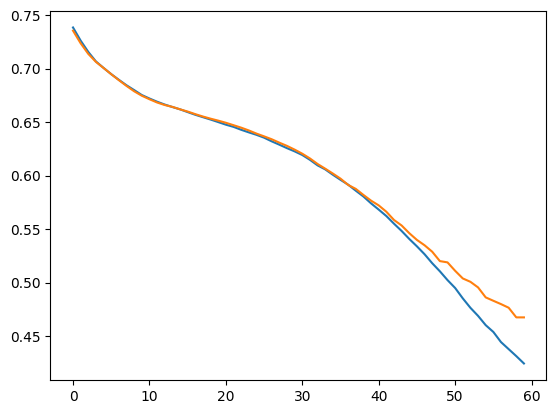

In [104]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [105]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 1ms/step


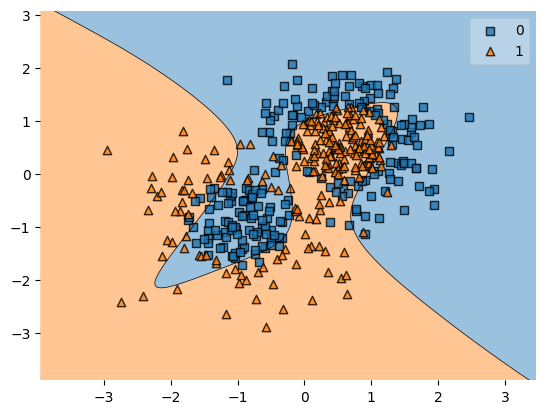

In [106]:
plot_decision_regions(x_trainf,y_train.values.astype(int),clf=model);

In [107]:
y_capf

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

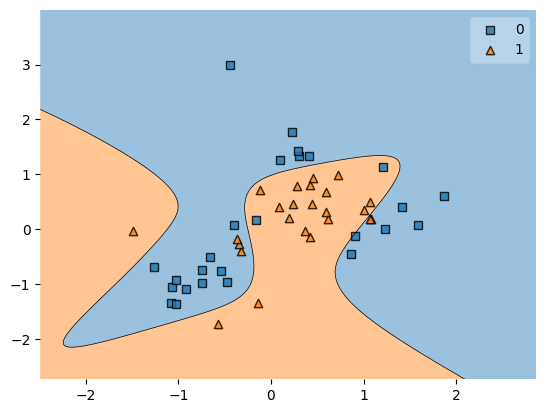

In [108]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

In [109]:
x_testf[[0,1]]

array([[-0.14434179, -1.33791227],
       [ 0.30173613,  1.32602925]])

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

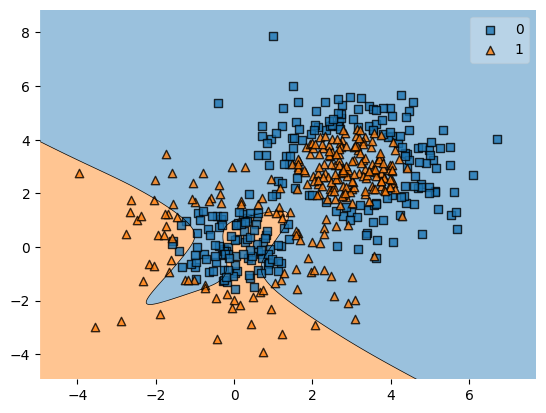

In [110]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)